<a href="https://colab.research.google.com/github/NithikaRamanathan/Quantum-Zeno-Effect/blob/main/ApplicationsofMediumArticleIonQ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scipy

In [ ]:
!pip install qiskit qiskit_ionq pylatexenc
from qiskit_ionq import IonQProvider

In [ ]:
pip install qiskit

In [ ]:
pip install pylatexenc

In [ ]:
import matplotlib.pyplot as plt
import qiskit
from qiskit import QuantumCircuit, assemble
import numpy as np
from qiskit.circuit import QuantumRegister, ClassicalRegister
from qiskit.circuit.library import RXGate
from qiskit.circuit.library import UGate
from qiskit.circuit.library import CXGate
from scipy.interpolate import interp1d

In [ ]:
pip install qiskit qiskit-aer

In [ ]:
from qiskit_aer import Aer
sim = Aer.get_backend('aer_simulator')

In [ ]:
provider = IonQProvider("WAUL3EgxQmFvYSB52uDAMgHg1Du9HmtH") # 198-2024 DO NOT SHARE THIS WITH ANYONE OUTSIDE CLASS

/usr/local/lib/python3.10/dist-packages/qiskit_ionq/helpers.py:563: UserWarning: Unable to get qubit count for simulator: 'qubits'. Defaulting to 100.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/qiskit_ionq/helpers.py:563: UserWarning: Unable to get qubit count for ionq_qpu: 'qubits'. Defaulting to 100.
  warnings.warn(


In [ ]:
import numpy as np

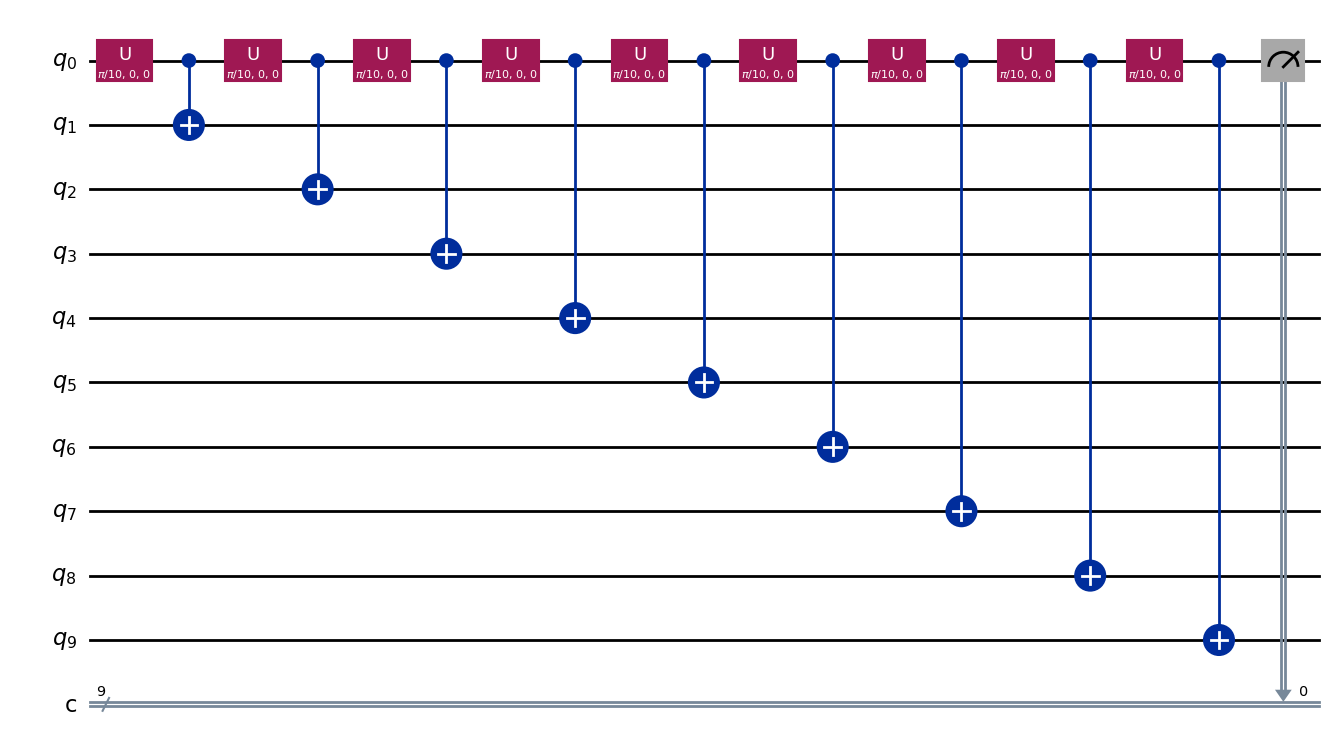

In [ ]:
time_steps = 10 # Choose the number of times to evolve the single qubit with a unitary gate - 20
theta = np.pi/(time_steps) # set parameter to determine how much the qubit's state is rotated with each timestep

qr = QuantumRegister(time_steps, 'q') # - 20
cr = ClassicalRegister(time_steps-1, 'c') # - 19
q_evolve = QuantumCircuit(qr, cr)


for time_step in range(1,time_steps):
    q_evolve.append(UGate(theta,0,0), [qr[0]]) # Add correct number of single-qubit gates to evolve the qubit's state
    if time_step < time_steps: # - 20
        q_evolve.cx(qr[0], qr[time_step])

q_evolve.measure(qr[0],cr[0])
q_evolve.draw("mpl")

In [ ]:
backend = provider.get_backend("ionq_qpu.aria-1")

/usr/local/lib/python3.10/dist-packages/qiskit_ionq/helpers.py:563: UserWarning: Unable to get qubit count for ionq_qpu.aria-1: 'qubits'. Defaulting to 100.
  warnings.warn(


In [ ]:
from qiskit import transpile
q_evolve_transpiled = transpile(q_evolve, backend)

<ipython-input-27-bed7cef51b04>:2: DeprecationWarning: The `transpile` function will stop supporting inputs of type `BackendV1` ( ionq_simulator ) in the `backend` parameter in a future release no earlier than 2.0. `BackendV1` is deprecated and implementations should move to `BackendV2`.
  q_evolve_transpiled = transpile(q_evolve, backend)
/usr/local/lib/python3.10/dist-packages/qiskit/providers/backend_compat.py:126: RuntimeWarning: No gate definition for cnot can be found and is being excluded from the generated target. You can use `custom_name_mapping` to provide a definition for this operation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/qiskit/providers/backend_compat.py:126: RuntimeWarning: No gate definition for i can be found and is being excluded from the generated target. You can use `custom_name_mapping` to provide a definition for this operation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/qiskit/providers/backend_compat.py:126: RuntimeWarning: No 

In [ ]:
job = backend.run(q_evolve_transpiled, shots=1000)
result = job.result()
counts = result.get_counts(q_evolve)

from qiskit.visualization import plot_histogram
plot_histogram(counts)

IonQJobFailureError: IonQJobFailureError('Unable to retreive result for job 16e6d5b9-3824-47cf-b926-4aefd3310c0f. Failure from IonQ API "QuotaExhaustedError: exhausted spending quota of type: project"')